In [221]:
include("functions.jl")

read_faculty_data (generic function with 1 method)

###  仮定
学科の方向性, 生徒の趣向は一様分布0 ~ 1

学科のlevelは一様分布0~1

生徒の成績は正規分布に従う(0.5が平均になるように調整)

In [2]:
faculty_num = 5
students_num = 100
mu = 50
sigma2 = 30
sigma2_error = 5

faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->0)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)

#println(s_prefs)
#println(f_prefs)

s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

println(s_matched, f_matched)
#sorted_students_list = get_sorted_students_list(students_list, faculties_list)
#println(sorted_students_list)


[0,3,3,5,5,5,1,2,5,5,0,3,4,0,3,0,3,1,4,5,5,4,4,0,4,5,5,1,0,1,4,2,4,5,5,4,3,0,2,5,4,2,2,5,4,5,2,5,1,1,0,2,5,0,1,2,2,2,1,0,4,2,4,2,1,3,3,5,3,5,5,5,2,2,3,2,0,4,3,2,3,2,4,5,5,1,3,1,3,1,2,0,1,0,4,0,2,0,5,5][55,90,28,7,18,50,88,93,59,65,30,86,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,43,80,91,73,8,32,56,97,52,76,82,74,47,58,64,62,42,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,2,37,15,69,3,81,79,87,89,17,75,12,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,95,78,83,33,61,36,41,45,63,13,23,25,22,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

各学部への応募の偏りです.

In [3]:
faculty_num = 20
students_num = 1000
mu = 50
sigma2 = 30
sigma2_error = 5

faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->0)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)
println()

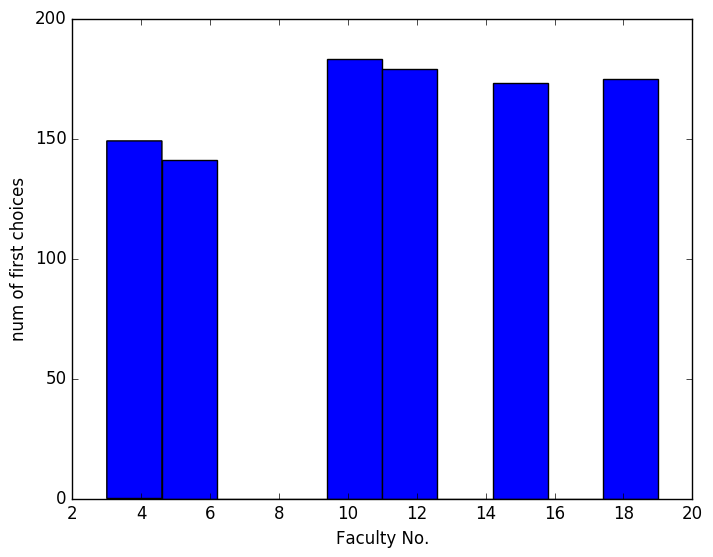

In [4]:
using PyPlot
fig, ax = subplots()
ax[:hist]([s_prefs[1, i] for i in 1:size(s_prefs, 2)])
xlabel("Faculty No.")
ylabel("num of first choices")
legend()

ある学部へ第一希望で応募する人の成績の分布です.

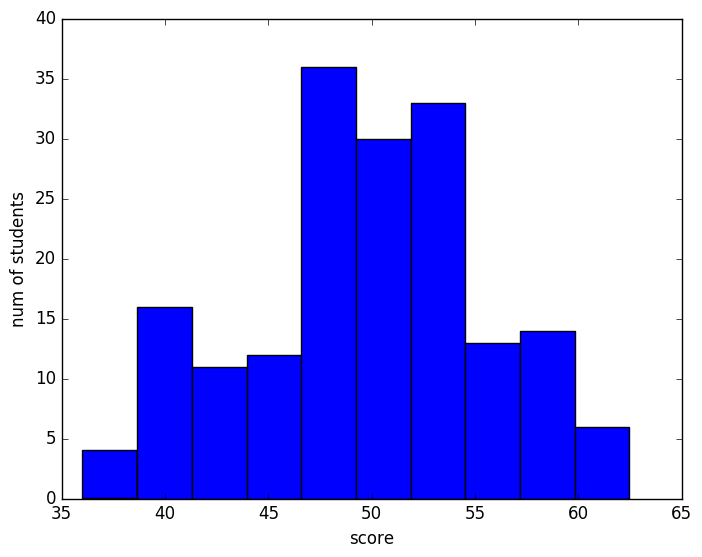

In [6]:
fig, ax = subplots()
ax[:hist](map(s -> s.level, filter(s -> s.prefs[1] == 19, students_list)))
xlabel("score")
ylabel("num of students")
#title(" $faculties_list[17].name")
legend()

生徒の成績と生徒の学部への選好が独立だと仮定しているので正規分布となりました.

<!--function cauchy()
    return tan(pi*(rand()-1/2))
end
cauchy()
l = 100
means = Array(Float64, l)
for k in 1:l
    num = 10
    cauchies = Array(Float64, num)
    for i in 1:num
        cauchies[i] = cauchy()
    end
    means[k] = mean(cauchies)
end
#cauchies
plot(means)
fig, ax = subplots()
ax[:hist](means)

l = 100
means = Array(Float64, l)
for k in 1:l
    num = 10
    rands = Array(Float64, num)
    for i in 1:num
        rands[i] = rand()
    end
    means[k] = mean(rands)
end
#cauchies
plot(means)
fig, ax = subplots()
ax[:hist](means)-->

In [21]:
include("functions.jl")
faculty_num = 20
student_num = 200
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

ev1 = []
ev2 = []
ev3 = []
ev4 = []
ev5 = []

for cap in 2:40
    faculties_list = [Faculty(string(i), i, Array(Int, student_num+1), rand(), rand(), cap, [i]) for i in 1:faculty_num]
    students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> 0)

    set_prefs_faculties(faculties_list, students_list)
    set_prefs_students(students_list, faculties_list)
    #println(faculties_list)

    s_prefs = generate_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    #println(s_prefs)
    #println(f_prefs)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

    push!(ev1, evaluate_matched(s_matched, s_prefs))
    push!(ev2, evaluate_matched2(s_matched, s_prefs))
    push!(ev3, evaluate_matched3(s_matched, s_prefs))
    push!(ev4, evaluate_matched4(s_matched, s_prefs))
    push!(ev5, evaluate_matched5(s_matched, s_prefs))
    #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
    #println(sorted_students_list)
end

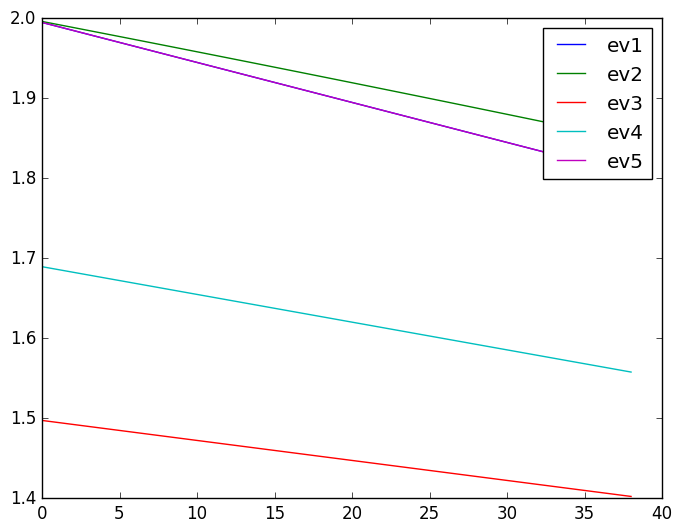

PyObject <matplotlib.legend.Legend object at 0x3192b3ac8>

In [22]:
using PyPlot
plot(ev1, label="ev1")
plot(ev2, label="ev2")
plot(ev3, label="ev3")
plot(ev4, label="ev4")
plot(ev5, label="ev5")
legend()

以降, 実際にシミュレーションしてみます.

簡単のため, 全科類枠については考えずに科類が指定された枠について考えます. またcapsの合計がほぼ1000なので, 第二段階利用人数は1000人とします.
まず成績しか見ないで応募する場合について,

In [79]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 1000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

faculties_list = read_faculty_data("revised.csv", student_num)
faculty_num = length(faculties_list)
students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> 0)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)
println()

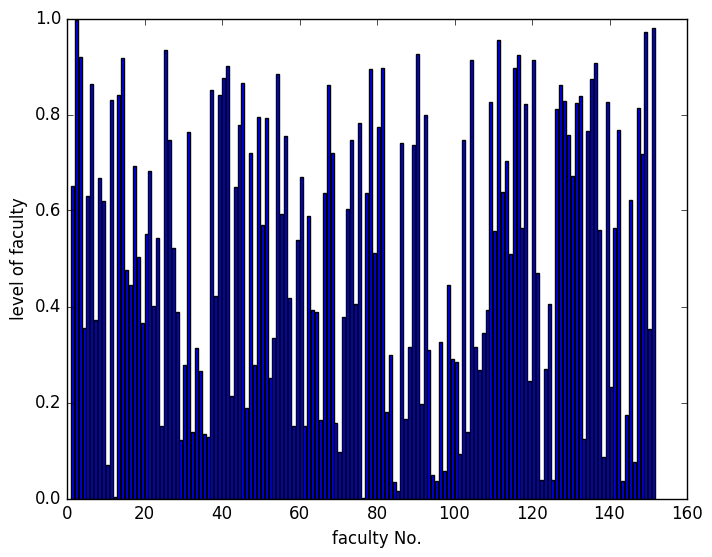

PyObject <matplotlib.text.Text object at 0x31b834630>

In [80]:
fig, ax = subplots()
ax[:bar]([f.id for f in faculties_list], [f.level for f in faculties_list])
ylabel("level of faculty")
xlabel("faculty No.")

学科のlevelのヒストグラムです.

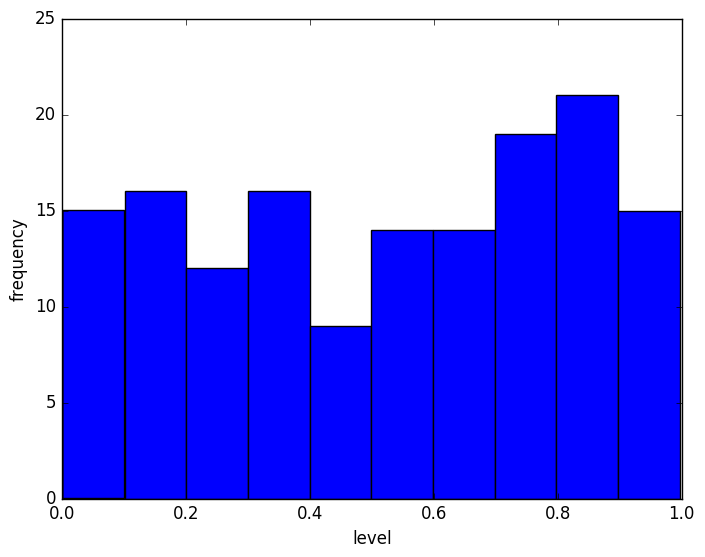

PyObject <matplotlib.text.Text object at 0x31c5c45f8>

In [81]:
fig, ax = subplots()
ax[:hist]([f.level for f in faculties_list])
ylabel("frequency")
xlabel("level")

学科の方向性のヒストグラムです.

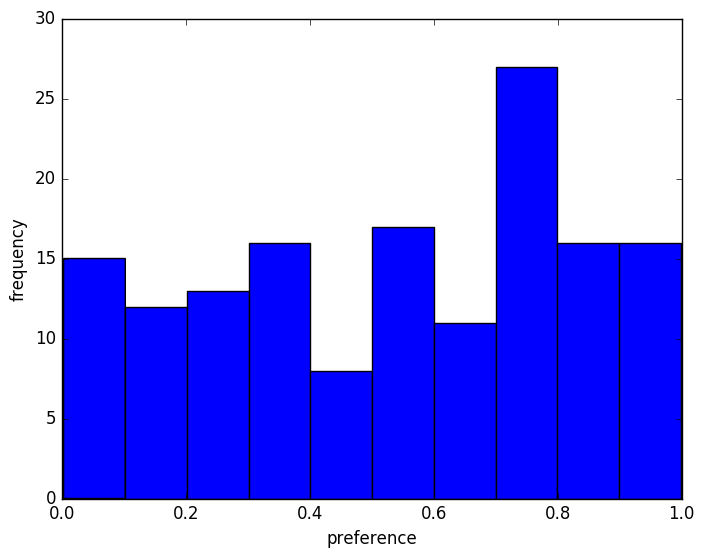

In [82]:
fig, ax = subplots()
ax[:hist]([f.preference for f in faculties_list])
ylabel("frequency")
xlabel("preference")
legend()

In [83]:
DA.check_data(s_prefs, f_prefs)

true

In [85]:
s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

([0,1,1,10,135,0,7,0,0,0  …  0,0,151,0,1,0,1,1,38,0],[148,982,664,462,894,624,560,995,813,747  …  0,0,0,0,162,743,717,993,941,152],[1,119,120,121,122,123,125,206,209,227  …  881,884,890,892,898,906,930,963,971,977])

以下マッチングの指標について.
少なければ全体としてより良いと考えられます.

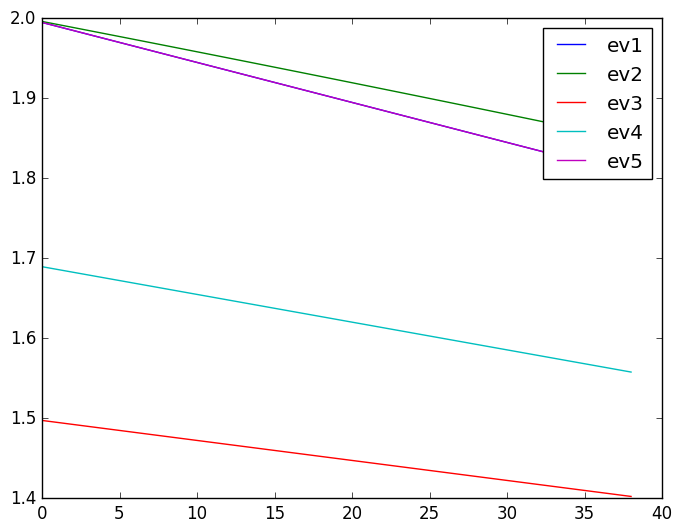

PyObject <matplotlib.legend.Legend object at 0x32136fd68>

In [161]:
using PyPlot
plot(ev1, label="ev1")
plot(ev2, label="ev2")
plot(ev3, label="ev3")
plot(ev4, label="ev4")
plot(ev5, label="ev5")
legend()

マッチングの指標1(マッチした学科の生徒にとっての順位を足して平均をとっています) min:1

In [86]:
evaluate_matched(s_matched, s_prefs)

8.031

マッチングの指標2(マッチした学科の生徒にとっての順位を二乗して足して平均をとり平方根をとっています) min:1

In [87]:
evaluate_matched2(s_matched, s_prefs)

11.339620804947579

マッチングの指標3(-1をマッチした学科の生徒にとっての順位で割り,足して平均をとっています) min:1, max: 2

In [88]:
evaluate_matched3(s_matched, s_prefs)

1.7448722364237081

マッチングの指標4(マッチした学科の生徒にとっての順位の対数を足して平均をとっています) min:1

In [89]:
evaluate_matched4(s_matched, s_prefs)

2.709394991265824

マッチングの指標5(マッチしていない人数の割合に1を足しています) min:1, max:2

In [90]:
evaluate_matched5(s_matched, s_prefs)

1.495

半分近くの人数がマッチできていないようです.

つぎに, 応募するときの成績を重視する傾向(1~0)を変えてevaluationがどうなるか見てみます.

In [149]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 1000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

akiramenai = []
akirameru = []
preferences  = collect(0:0.05:1)
for preference in preferences
    faculties_list = read_faculty_data("revised.csv", student_num)
    faculty_num = length(faculties_list)
    students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> preference)

    set_prefs_faculties(faculties_list, students_list)
    set_prefs_students(students_list, faculties_list)
    set_real_prefs_students(students_list, faculties_list)
    #println(faculties_list)

    s_prefs = generate_prefs(students_list)
    s_real_prefs = get_real_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    #println(s_prefs)
    #println(f_prefs)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

    #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
    #println(sorted_students_list)
    push!(akirameru, evaluate_matched(s_matched, s_prefs))
    push!(akiramenai, evaluate_matched(s_matched, s_real_prefs))
end

In [150]:
evaluate_matched5(s_matched, s_prefs)

1.488

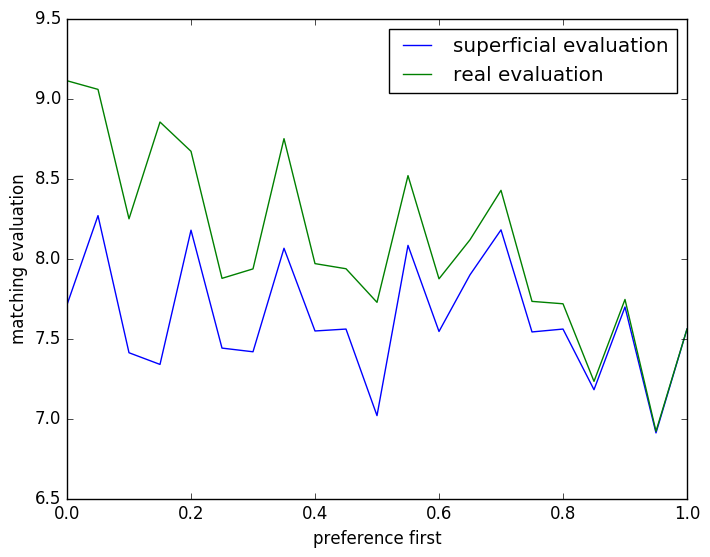

PyObject <matplotlib.legend.Legend object at 0x31593ea20>

In [151]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
xlabel("preference first")
ylabel("matching evaluation")
legend()

superficial evaluationは, 設定したpreference firstの値のもとでの学科の選好が真の選好であるとした時のevaluationの値で, real evaluation　は, preference を元に計算したevaluationの値です. 両者はpreference first = 1の時に一致します.
グラフがカクカクしているので, 何回も試して平均を取ることにします.

In [152]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 1000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

akiramenai = []
akirameru = []
preferences  = collect(0:0.05:1)
loops = 10
for preference in preferences
    ev_sup = []
    ev_real = []
    for i in 1:loops
        faculties_list = read_faculty_data("revised.csv", student_num)
        faculty_num = length(faculties_list)
        students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        s_real_prefs = get_real_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        #println(s_prefs)
        #println(f_prefs)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
        push!(ev_real, evaluate_matched(s_matched, s_real_prefs))

        #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
        #println(sorted_students_list)
    end
    push!(akirameru, mean(ev_sup))
    push!(akiramenai, mean(ev_real))
end

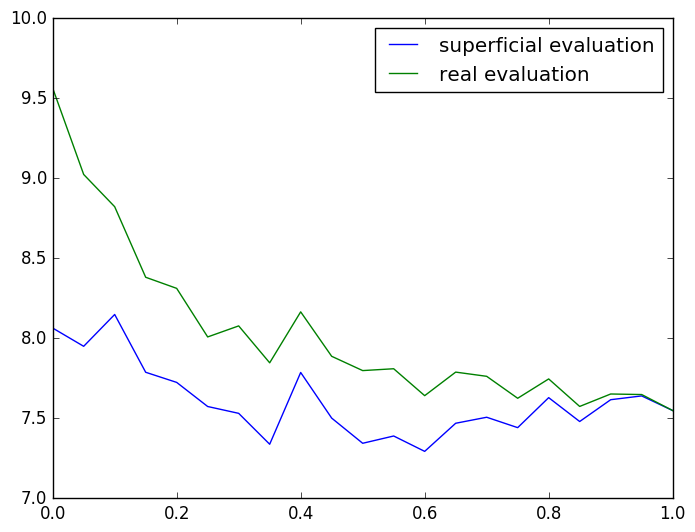

PyObject <matplotlib.legend.Legend object at 0x3159b0198>

In [153]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
legend()

preferenceが１に近い(自分が行きたいところに行く)と, マッチングの評価が高くなるように見えます. シミュレーションに時間がかかるので規模を小さくして実行してみます. 学科数５，生徒数100とし, 学科のcapを100/5とします.

In [142]:
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
akiramenai = []
akirameru = []
preferences  = collect(0:0.05:1)
loops = 100
for preference in preferences
    ev_sup = []
    ev_real = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for f in faculties_list
            f.cap = cap
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
        push!(ev_real, evaluate_matched(s_matched, s_real_prefs))
    end
    push!(akirameru, mean(ev_sup))
    push!(akiramenai, mean(ev_real))
end

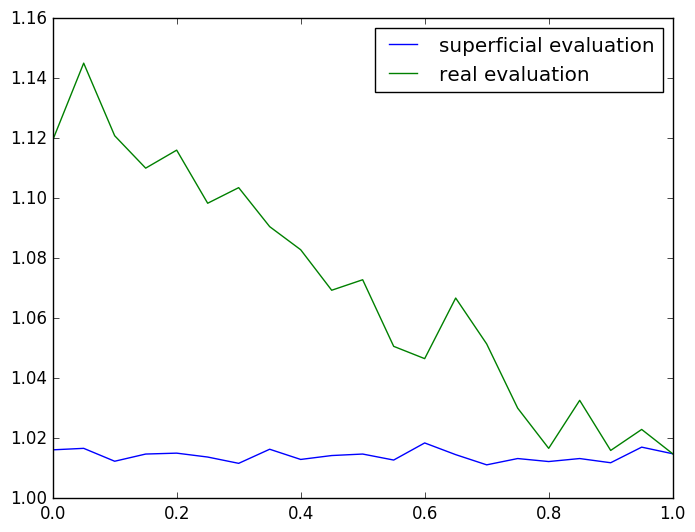

PyObject <matplotlib.legend.Legend object at 0x31e8c3a20>

In [143]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
legend()

学科のcapを10~30の間で変えて, real evaluation の変化を見てみます.

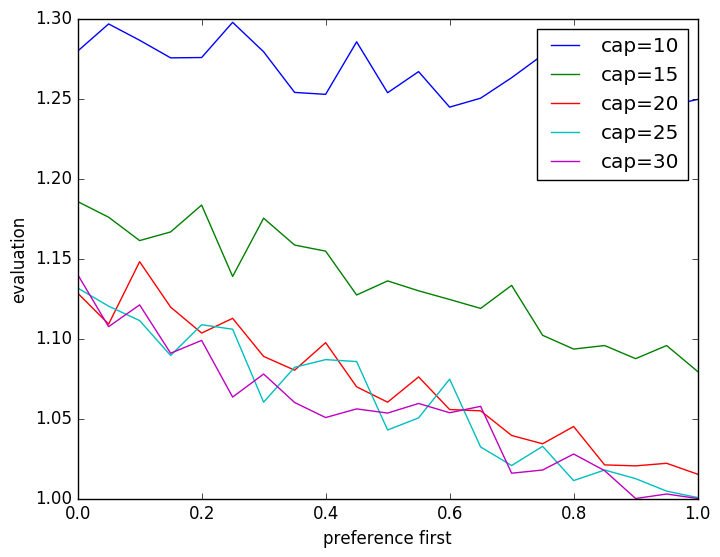

PyObject <matplotlib.legend.Legend object at 0x321e89048>

In [184]:
faculty_num = 5
students_num = 100

mu = 50
sigma2 = 30
sigma2_error = 5
preferences  = collect(0:0.05:1)
loops = 50
for cap in 10:5:30
    akiramenai = []
    for preference in preferences
        ev_sup = []
        ev_real = []
        for i in 1:loops
            faculties_list = generate_faculties(faculty_num, students_num)
            for f in faculties_list
                f.cap = cap
            end
            students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

            set_prefs_faculties(faculties_list, students_list)
            set_prefs_students(students_list, faculties_list)
            set_real_prefs_students(students_list, faculties_list)
            #println(faculties_list)

            s_prefs = generate_prefs(students_list)
            f_prefs = generate_prefs(faculties_list)
            caps = generate_caps(faculties_list)

            s_real_prefs = get_real_prefs(students_list)

            s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
            push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
            push!(ev_real, evaluate_matched(s_matched, s_real_prefs))
        end
        push!(akiramenai, mean(ev_real))
    end
    plot(preferences, akiramenai, label="cap=$cap")
    xlabel("preference first")
    ylabel("evaluation")
end
legend()

結局, capを変えても自分のpreferenceを重視したほうがより良いマッチングになる傾向が読み取れます. つぎに, マッチングできず余る生徒について見てみます. 科類ごとに学科が一つある時について

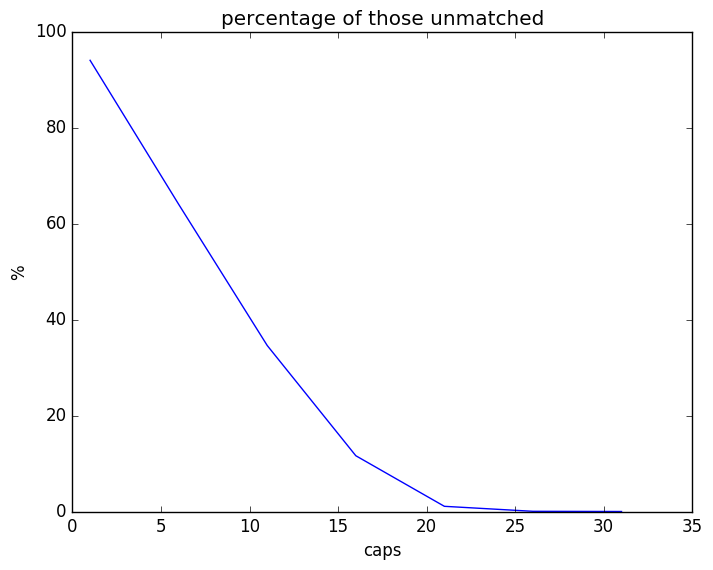

In [183]:
faculty_num = 6
students_num = 100

mu = 50
sigma2 = 30
sigma2_error = 5
preference  = 0.8
loops = 50
caps0 = collect(1:5:31)

akiramenai = []
for cap in caps0
    ev_real = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for (i, f) in enumerate(faculties_list)
            f.cap = cap
            f.available_for = [i]
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_real, evaluate_matched5(s_matched, s_real_prefs))
    end
    push!(akiramenai, mean(ev_real))
end
plot(caps0, 100.*(akiramenai.-1))
title("percentage of those unmatched")
ylabel("%")
xlabel("caps")
legend()

次に, 従来の進学振り分けとDAによる進学振り分けを比較してみます. まず従来の進振りで成績を重視する割合を変えてみると,

In [228]:
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
akiramenai = []
akirameru = []
preferences  = collect(0:0.05:1)
loops = 100
for preference in preferences
    ev_sup = []
    ev_real = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for f in faculties_list
            f.cap = cap
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = easy_matching(students_list, caps)
        push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
        push!(ev_real, evaluate_matched(s_matched, s_real_prefs))
    end
    push!(akirameru, mean(ev_sup))
    push!(akiramenai, mean(ev_real))
end

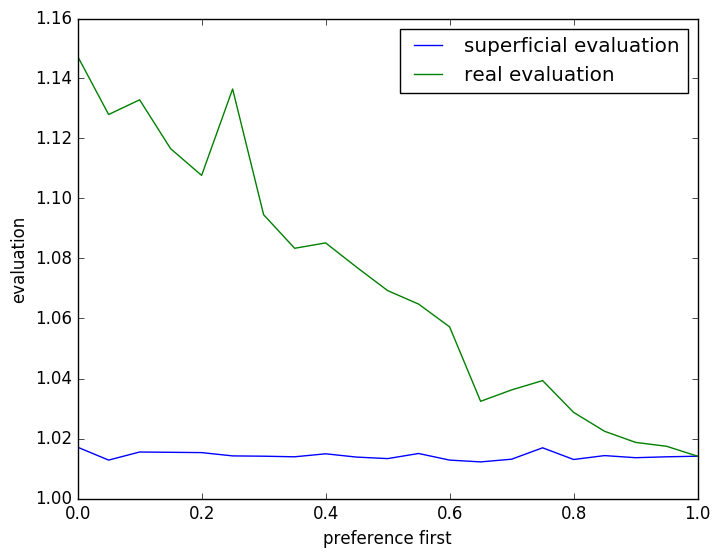

PyObject <matplotlib.legend.Legend object at 0x31e05c828>

In [229]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
xlabel("preference first")
ylabel("evaluation")
legend()

DAによるマッチングのevaluationもプロットしてみると,

In [250]:
faculty_num = 5
students_num = 100
cap = div(2*students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
da = []
traditional = []
real = []
preferences  = collect(linspace(0, 1, 5))
loops = 100
for preference in preferences
    ev_da = []
    ev_traditional = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for f in faculties_list
            f.cap = cap
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_da,　evaluate_matched(s_matched, s_real_prefs))
        s_matched2, f_matched2, indptr2 = easy_matching(students_list, caps)
        push!(ev_traditional, evaluate_matched(s_matched2, s_real_prefs))
    end
    push!(da, mean(ev_da))
    push!(traditional, mean(ev_traditional))
end

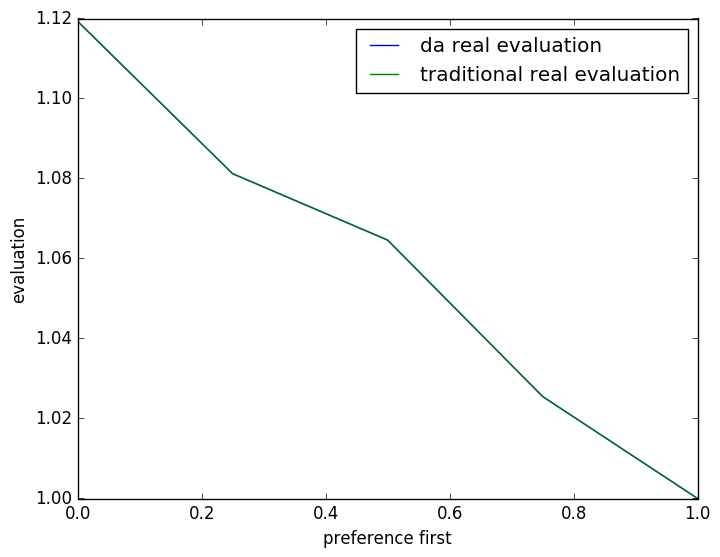

PyObject <matplotlib.legend.Legend object at 0x324816b00>

In [251]:
plot(preferences, da, label="da real evaluation")
plot(preferences, traditional, label="traditional real evaluation")
xlabel("preference first")
ylabel("evaluation")
legend()

..?